## Part 2 - Linear Regression
Examining the relationship between a player's pass volume and completion percentage

In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

Load data from StatsBomb GitHub page.

In [6]:
base_url = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/"
comp_url = base_url + "matches/{}/{}.json"
match_url = base_url + "events/{}.json"

We will use a modification of the `parse_data` function were we extract `passes` and only the attributes `player_id` and `outcome`.

In [7]:
def parse_data(competition_id, season_id):
    matches = requests.get(url=comp_url.format(competition_id, season_id)).json()
    match_ids = [match['match_id'] for match in matches]

    all_events = []
    for match_id in match_ids:

        events = requests.get(url=match_url.format(match_id)).json()
        
        passes = [x for x in events if x['type']['name'] == "Pass"]
        for p in passes:
            attributes = {
                "player_id": p['player']['id'],
                "outcome": 0 if 'outcome' in p['pass'].keys() else 1,
            }
            all_events.append(attributes)
            
    return pd.DataFrame(all_events)

In [8]:
WC_id = 43
season_id = 3
df = parse_data(WC_id, season_id)

We will now caculate the total number of passes and pass completion percentage for each player (player_id).

In [13]:
total_passes = df.groupby("player_id")["outcome"].sum()
percentage = df.groupby("player_id")["outcome"].mean()

The total passes and pass percentage for every player can now be plotted in a scatter to give an initial thought about the correlation.

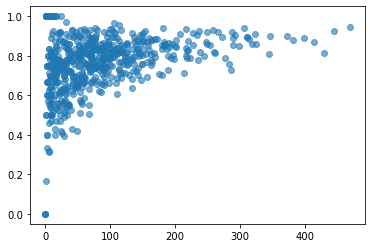

In [15]:
plt.scatter(total_passes, percentage, alpha = 0.6)
plt.show()

We will use LinearRegression from `sklearn` to peform the linear regression on the total passes and pass completion%.

In [ ]:
from sklearn.Linear_Model import LinearRegression

#### In this section I will explore the dataset myself and perform LinearRegression on other interesting metrics.